# Análisis del modelo con fine-tunning

Fuente: [Fine-tuning OpenAI API](https://platform.openai.com/docs/guides/fine-tuning/analyzing-your-fine-tuned-model)


In [1]:
!pip install openai


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Uso de modelo con fine-tuning

In [ ]:
## Código exportado del Playground de OpenAI

from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.environ.get("API_KEY")
client = OpenAI(api_key=API_KEY)

response = client.responses.create(
  model="your-model-name",
  input=[
    {
      "role": "system",
      "content": [
        {
          "type": "input_text",
          "text": "Eres un asistente de atención a clientes y estudiantes de la plataforma de educación online en tecnología, inglés y liderazgo llamada Platzi"
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "input_text",
          "text": "Que curso tomar para prender redes neuronales?"
        }
      ]
    },
    {
      "id": "msg_0a3e490ad791a6b40069604def86188197afde8f57308dc154",
      "role": "assistant",
      "content": [
        {
          "type": "output_text",
          "text": "Para aprender sobre redes neuronales, te recomiendo el Curso de Redes Neuronales Artificiales: Fundamentos en https://platzi.com/cursos/redes-neuronales/ donde aprenderás desde los conceptos básicos hasta la implementación de modelos de redes neuronales."
        }
      ]
    }
  ],
  text={
    "format": {
      "type": "text"
    }
  },
  reasoning={},
  tools=[],
  temperature=0,
  max_output_tokens=2048,
  top_p=1,
  store=True,
  include=["web_search_call.action.sources"]
)

In [9]:
# print(response.choices[0].message.content)
print(response.output[0].content[0].text)

Para aprender sobre redes neuronales, te recomiendo el Curso de Redes Neuronales Artificiales: Fundamentos en https://platzi.com/cursos/redes-neuronales/ donde aprenderás desde los conceptos básicos hasta la implementación de modelos de redes neuronales.


## Carga de modelo con fine-tuning

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.environ.get("API_KEY")
client = OpenAI(api_key=API_KEY)

client.fine_tuning.jobs.retrieve("your model name")


NotFoundError: Error code: 404 - {'error': {'message': 'Could not find fine tune: your model name', 'type': 'invalid_request_error', 'param': 'fine_tune_id', 'code': 'fine_tune_not_found'}}

## Obtener archivo de resultados de fine-tuning de modelo

In [ ]:

import base64


content = client.files.content('file-')

content.text

file_content = base64.b64decode(content.read())
print(file_content.decode('utf-8'))

step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
1,1.30467,0.73333,,
2,1.42548,0.71429,,
3,1.58144,0.71523,,
4,1.63343,0.71429,,
5,1.96122,0.73034,,
6,1.32692,0.78409,,
7,1.79324,0.68333,,
8,1.49142,0.73006,,
9,1.65714,0.62434,,
10,2.08455,0.64943,,
11,1.63911,0.68919,,
12,1.73644,0.69588,,
13,1.8807,0.69072,,
14,1.39622,0.69792,,
15,1.15955,0.70352,,
16,1.37265,0.63905,,
17,1.47465,0.74096,,
18,1.7151,0.7,,
19,1.33372,0.72121,,
20,1.06191,0.74783,,
21,1.53097,0.65714,,
22,1.66956,0.72477,,
23,1.35755,0.6755,,
24,1.36421,0.73684,,
25,1.40235,0.6391,,
26,1.57705,0.64615,,
27,1.83566,0.62431,,
28,1.21955,0.73427,,
29,1.08718,0.69892,,
30,1.76977,0.62903,,
31,1.32002,0.67391,,
32,1.08978,0.71875,,
33,1.37235,0.72857,,
34,1.11395,0.74545,,
35,1.38601,0.73585,,
36,1.43987,0.71654,,
37,1.53708,0.675,,
38,1.04478,0.76033,,
39,0.97763,0.7561,,
40,0.70396,0.75969,,
41,0.74848,0.78169,,
42,0.63681,0.8169,,
43,0.90524,0.70861,,
44,1.00115,0.71875,,
45,0.89832,0.74603,,
46,0.766

## Interpretación de resultados

In [19]:
import pandas as pd

In [20]:
metrics_str = file_content.decode('utf-8')

In [21]:
metrics_list = [line.split(',') for line in metrics_str.split('\n')]

In [22]:
df = pd.DataFrame(metrics_list[1:], columns=metrics_list[0])
df = df.apply(pd.to_numeric, errors='coerce')
df.tail()

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
1888,1889.0,0.33747,0.90476,NaN,NaN
1889,1890.0,0.38874,0.87755,NaN,NaN
1890,1891.0,0.30558,0.90152,NaN,NaN
1891,1892.0,0.96454,0.75000,0.65905,0.81452
1892,NaN,NaN,NaN,NaN,NaN


In [23]:
#conversión a numéricos para graficación
df = df.apply(pd.to_numeric, errors='coerce')
df.tail()

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
1888,1889.0,0.33747,0.90476,NaN,NaN
1889,1890.0,0.38874,0.87755,NaN,NaN
1890,1891.0,0.30558,0.90152,NaN,NaN
1891,1892.0,0.96454,0.75000,0.65905,0.81452
1892,NaN,NaN,NaN,NaN,NaN


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


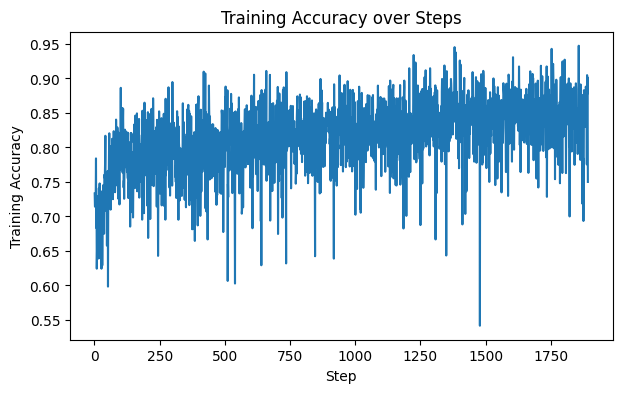

In [24]:
%pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(df['step'], df['train_accuracy'])
plt.title('Training Accuracy over Steps')
plt.xlabel('Step')
plt.ylabel('Training Accuracy')
plt.show()

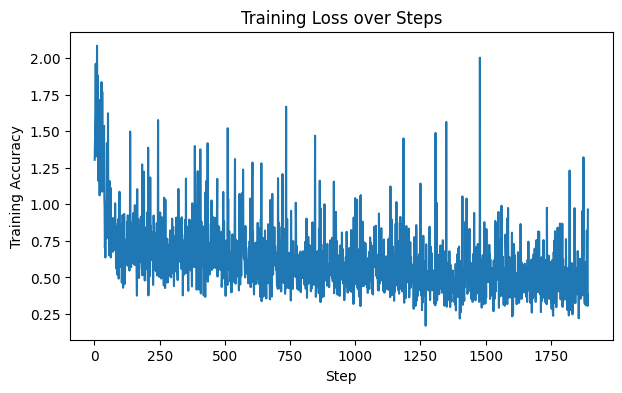

In [25]:
plt.figure(figsize=(7,4))
plt.plot(df['step'], df['train_loss'])
plt.title('Training Loss over Steps')
plt.xlabel('Step')
plt.ylabel('Training Accuracy')
plt.show()

## Ajuste de parámetros de modelo

In [27]:
## Código exportado del Playground de OpenAI

response = client.responses.create(
  model="ft:gpt-3.5-turbo-1106:rafael-menchaca:platzi-experiment:CvatzLG1",
  input=[
    {
      "role": "system",
      "content": [
        {
          "type": "input_text",
          "text": "Eres un asistente de atención a clientes y estudiantes de la plataforma de educación online en tecnología, inglés y liderazgo llamada Platzi"
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "input_text",
          "text": "Como puedo mejorar mis habilidades de creacion de contenido con inteligencia artificial?"
        }
      ]
    },
    {
      "id": "msg_0928df05eef59c5f006960557f52ac81949022515c3be1eb72",
      "role": "assistant",
      "content": [
        {
          "type": "output_text",
          "text": "Te recomiendo el Curso de Creación de Contenido con Inteligencia Artificial en Platzi. Aprenderás a utilizar herramientas de IA para generar contenido de calidad y atractivo para tu audiencia. Además, podrás aplicar estos conocimientos en diferentes áreas como marketing, publicidad, periodismo, entre otros. ¡No te lo pierdas!"
        }
      ]
    }
  ],
  text={
    "format": {
      "type": "text"
    }
  },
  reasoning={},
  tools=[],
  temperature=0.34,
  max_output_tokens=2048,
  top_p=1,
  store=True,
  include=["web_search_call.action.sources"]
)

print(response.output[0].content[0].text)

¡Claro que sí! En Platzi tenemos una gran variedad de cursos para aprender sobre tecnología, negocios y habilidades blandas. Puedes empezar con el Curso de Introducción a la Programación o el Curso de Fundamentos de Marketing Digital para adquirir conocimientos básicos en estas áreas. Además, te recomiendo explorar nuestra sección de carreras para encontrar un camino de aprendizaje más estructurado y especializado. ¡Aprende con Platzi y alcanza tus metas!
